In [1]:
## Data Preprocessing for Machine Learning using the 'Titanic Dataset'

# The Titanic dataset is a classic dataset used in data science and machine learning tutorials. 
# It contains information about passengers on the Titanic, including whether they survived or not, 
# along with features like age, class, sex, and fare.

In [3]:
# Step 1: Import Necessary Libraries
# Importing essential libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Step 2: Load the Dataset
# Loading the Titanic dataset from a CSV file

df = pd.read_csv('titanic.csv')

# Displaying the first few rows 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


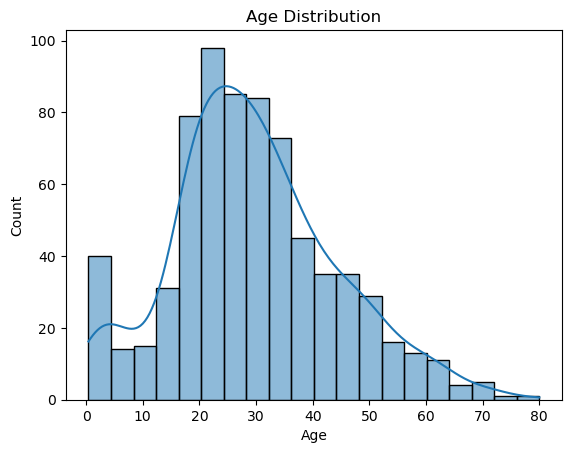

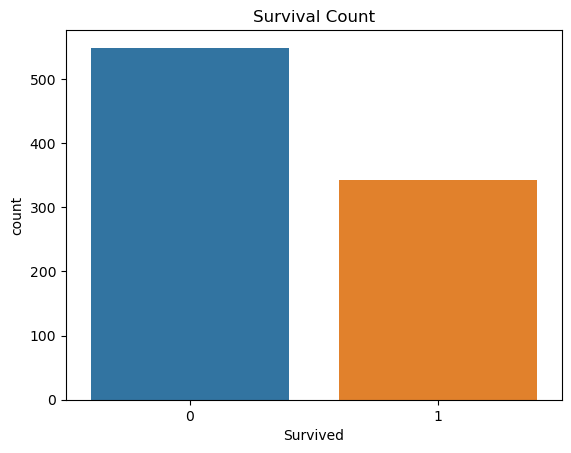

In [7]:
# Step 3: Exploratory Data Analysis (EDA)

# Checking for missing values in each column
df.isnull().sum()

# Displaying basic statistics of numerical columns
df.describe()

# Visualizing the distribution of 'Age' column
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Visualizing the count of survivors vs non-survivors
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

In [9]:
# Step 4: Data Cleaning

# Imputing missing 'Age' values with the median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Dropping rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

# Dropping 'Cabin' column due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# Step 5: Feature Engineering

# Creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
# We created a new feature FamilySize by adding SibSp (siblings/spouses aboard) and Parch (parents/children aboard).
df['FamilySize'] = df['SibSp'] + df['Parch']

# Extracting titles from 'Name' column and creating a new 'Title' feature
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [13]:
#Step 6: Encoding Categorical Variables

# Encoding 'Sex' column using Label Encoding, helps model process gender numerically for learning.
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-Hot Encoding 'Embarked' and 'Title' columns
# Converts categorical ports, Title into separate binary features — allows the model to understand port-specific patterns.
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)


In [15]:
# Step 7: Feature Scaling

# Scaling numerical features using StandardScaler 
# This brings them onto the same scale, making model training more stable and accurate.

scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

In [17]:
# Step 8: Prepare Data for Modeling

# Defining features (X) and target variable (y)
X = df.drop(columns=['Survived', 'Name', 'Ticket'])
y = df['Survived']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
## Sample output for pur pre processed data below : 

# Save the preprocessed dataset
df.to_csv('titanic_preprocessed.csv', index=False)

# Load the preprocessed dataset
df_preprocessed = pd.read_csv('titanic_preprocessed.csv')

# Ensure all columns are shown in output
pd.set_option('display.max_columns', None)

# Display Sample of the first few rows
print(df_preprocessed.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.563674      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.669217      1   
2                             Heikkinen, Miss. Laina    0 -0.255451      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.438050      1   
4                           Allen, Mr. William Henry    1  0.438050      0   

   Parch            Ticket      Fare  FamilySize  Embarked_Q  Embarked_S  \
0      0         A/5 21171 -0.500240    0.057853           0           1   
1      0          PC 17599  0.788947    0.057853           0           0   
2      0  STON/O2. 3101282 -0.486650   -0.561804           0           1   
3      0  

In [21]:
## The above script demonstrates comprehensive data preprocessing techniques:
#
#  - Handling missing values using imputation and removal
#  - Encoding categorical variables with label and one-hot encoding
#  - Feature engineering by creating new features
#  - Scaling numerical features for model readiness
#  - Splitting the dataset into training and testing sets
#
# These steps are essential for preparing raw data for machine learning models, 
#   ensuring better model performance and accuracy.
